# Week Three - Part 2 - Assignment

Team 2 - Pavan Akula, Nathan(Seoungyoon) Lim, Christophe Hunt, Joel Park, Ilya Kats

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   [For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2. Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
3. Python code to create dataset: https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an IPython notebook stored in your GitHub repository.

You may work in a small group on this project.

Video Link: https://youtu.be/HT-Qs6WnNqw

# Using the Python Code to Create Dataset

Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).

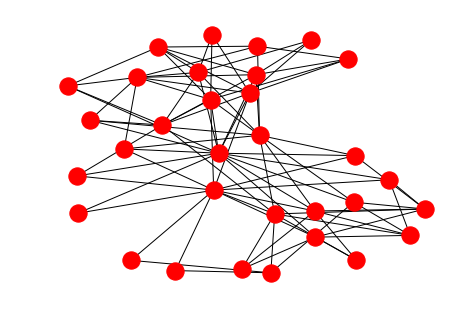

In [2]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite

import warnings
warnings.filterwarnings('ignore')

G = nx.davis_southern_women_graph()

# Draw the bipartite graph of women and clubs
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

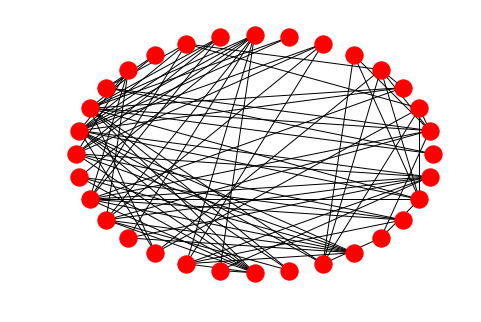

In [3]:
# Circular drawing pattern, which clearly demonstrates some nodes more connected than others.
nx.draw_circular(G)
plt.show()

In [4]:
# This particular code separates the two sets of nodes into 'women' and the other 'clubs'
women = G.graph['top']
clubs = G.graph['bottom']

In [3]:
# Display the items in the 'women' list
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [15]:
# Display the items in the 'clubs' list
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [4]:
# Creates a new bipartite graph from a biadjacency matrix given as a SciPy sparse matrix.
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [5]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


https://rdrr.io/cran/latentnet/man/davis.html
    
The above website provides an excellent overview as to what they were investigating in this 1941 dataset. This particular study was to look at social class and the way women's informal social patterns in the 1940s. According to the website, "DGG was concerned with the issue of how much the informal contacts made by individuals were established solely (or primarily) with others at approximately their own class levels. To address this question the authors collected data on social events and examined people's patterns of informal contacts."

So in this data set, they had followed 18 women over the course of 9 months. During this time, various subsets of women had met in 14 informal events (a.k.a. clubs). The information listed above demonstrates some of the findings the investigators had found.

Let's take a closer look at the data set.

In [18]:
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


When we project graph G into W (where the primary nodes are women), we see that there are a total of 18 nodes (which there are exactly 18 women in this study), and 139 connections (edges) among them. We can list the node degree for each women, which is shown below. The average degree here is 15.4444, which indicates that these women knew a significant amount of other women and interacted with them.

In [19]:
hist = nx.degree(W)
hist

{'Brenda Rogers': 15,
 'Charlotte McDowd': 11,
 'Dorothy Murchison': 16,
 'Eleanor Nye': 15,
 'Evelyn Jefferson': 17,
 'Flora Price': 12,
 'Frances Anderson': 15,
 'Helen Lloyd': 17,
 'Katherina Rogers': 16,
 'Laura Mandeville': 15,
 'Myra Liddel': 16,
 'Nora Fayette': 17,
 'Olivia Carleton': 12,
 'Pearl Oglethorpe': 16,
 'Ruth DeSand': 17,
 'Sylvia Avondale': 17,
 'Theresa Anderson': 17,
 'Verne Sanderson': 17}

In [20]:
# Plotting a histogram of the women and their respective 'node degrees'
W_hist = sorted(nx.degree(W).values())
W_hist

[11, 12, 12, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17]

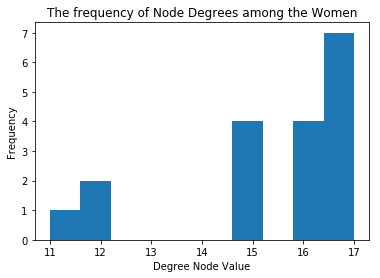

In [9]:
# Let's provide a visualization of what this looks like 
import numpy as np
# from matplotlib import pyplot as plt

plt.hist(W_hist)
plt.title("The frequency of Node Degrees among the Women")
plt.xlabel("Degree Node Value")
plt.ylabel("Frequency")
plt.show()

Let's look at an individual woman in this group, i.e. 'Brenda Rogers'. She has a 'node degree' of 15, or in other words, she has been in get togethers/interacted with 15 other women. The list of women she had interacted with her are listed below. Also noted is the weight of the 'edges' connected to them. (Which the higher the number likely indicates the stronger the interaction with this particular individual.)

In [21]:
W['Brenda Rogers']

{'Charlotte McDowd': {'weight': 4},
 'Dorothy Murchison': {'weight': 1},
 'Eleanor Nye': {'weight': 4},
 'Evelyn Jefferson': {'weight': 6},
 'Frances Anderson': {'weight': 4},
 'Helen Lloyd': {'weight': 2},
 'Katherina Rogers': {'weight': 1},
 'Laura Mandeville': {'weight': 6},
 'Myra Liddel': {'weight': 1},
 'Nora Fayette': {'weight': 2},
 'Pearl Oglethorpe': {'weight': 2},
 'Ruth DeSand': {'weight': 3},
 'Sylvia Avondale': {'weight': 2},
 'Theresa Anderson': {'weight': 6},
 'Verne Sanderson': {'weight': 2}}

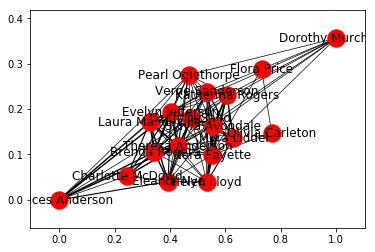

In [18]:
import math
weights=[math.log(edata['weight']) for f,t,edata in W.edges(data=True)]
nx.draw_networkx(W,width=weights)
plt.show()

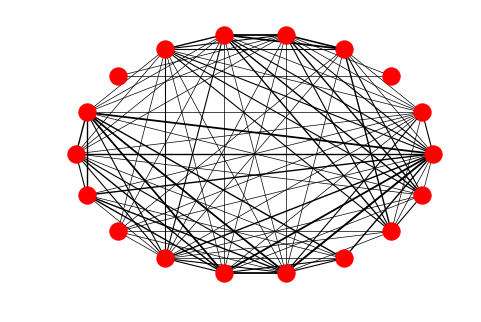

In [37]:
weights=[math.log(edata['weight']) for f,t,edata in W.edges(data=True)]
nx.draw_circular(W,width=weights)
plt.show()

When we take a look at the graph in regards to its location, we see that a majority of the women appear close to each other. There are, however, some women do appear on the periphery, such as Dorothy Murchison, Pearl Oglethorpe, etc. which may indicate that they may not be part of this 'clique'. Let's take Dorothy Murchison for example.

In [77]:
W['Dorothy Murchison']

{'Brenda Rogers': {'weight': 1},
 'Eleanor Nye': {'weight': 1},
 'Evelyn Jefferson': {'weight': 2},
 'Flora Price': {'weight': 1},
 'Frances Anderson': {'weight': 1},
 'Helen Lloyd': {'weight': 1},
 'Katherina Rogers': {'weight': 2},
 'Laura Mandeville': {'weight': 1},
 'Myra Liddel': {'weight': 2},
 'Nora Fayette': {'weight': 1},
 'Olivia Carleton': {'weight': 1},
 'Pearl Oglethorpe': {'weight': 2},
 'Ruth DeSand': {'weight': 2},
 'Sylvia Avondale': {'weight': 2},
 'Theresa Anderson': {'weight': 2},
 'Verne Sanderson': {'weight': 2}}

As you can see, the weights alone are all in the 1 to 2 range. I suspect that Dorothy Murchison is more likely to be mere acquaintances (as opposed to a true friendship) who do not typically mix with the other women.

Since this graph appears connected, let's actually see if this indeed the case. If so, let's calculate the diameter of this graph.

In [8]:
nx.is_connected(G)

True

In [81]:
diam = nx.diameter(G, e = None)
diam

4

The diameter of this graph is 4, which suggests that even if the women do not all mix together closely. They are at the very most 4 degrees of separation apart. 

In [60]:
nx.density(W)

0.9084967320261438

The more dense the graph (closer to 1.0), the more connected the graph is. In other words, a score of 0.0 is a graph with only nodes and NO edges. As you can see, with a density of 0.908, this is a very well connected graph, again suggesting that the women overall in some shape associates with each other.

In [12]:
# Define function that would create a sorted list, from highest to lowest
# This function was taken from page 47 from "Social Network Analysis for Startups".

def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k)) 
    return ms

In [13]:
close = nx.closeness_centrality(W)
sorted_map(close)

[('Evelyn Jefferson', 1.0),
 ('Helen Lloyd', 1.0),
 ('Nora Fayette', 1.0),
 ('Ruth DeSand', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Theresa Anderson', 1.0),
 ('Verne Sanderson', 1.0),
 ('Dorothy Murchison', 0.9444444444444444),
 ('Katherina Rogers', 0.9444444444444444),
 ('Myra Liddel', 0.9444444444444444),
 ('Pearl Oglethorpe', 0.9444444444444444),
 ('Brenda Rogers', 0.8947368421052632),
 ('Eleanor Nye', 0.8947368421052632),
 ('Frances Anderson', 0.8947368421052632),
 ('Laura Mandeville', 0.8947368421052632),
 ('Flora Price', 0.7727272727272727),
 ('Olivia Carleton', 0.7727272727272727),
 ('Charlotte McDowd', 0.7391304347826086)]

It appears that all of the closeness_centrality scores are quite high, ranging from 0.7391304347 to 1.0, with 1.0 being a perfect score. Closeness is a measure of the degree to which an individual is near all other individuals in a network. Interestingly, I did make a claim that Dorothy Murchison was likely an outsider to this 'clique', but her closeness_centrality score was quite high 0.9444444. 

In [15]:
eigen = nx.eigenvector_centrality(W)
sorted_map(eigen)

[('Theresa Anderson', 0.3535543079787813),
 ('Evelyn Jefferson', 0.31851939808941326),
 ('Brenda Rogers', 0.3042441458828134),
 ('Laura Mandeville', 0.3004071023132385),
 ('Sylvia Avondale', 0.27287816402411424),
 ('Nora Fayette', 0.25327409433896136),
 ('Ruth DeSand', 0.24851046730154439),
 ('Eleanor Nye', 0.23903727426379084),
 ('Verne Sanderson', 0.23070022516533012),
 ('Katherina Rogers', 0.22197541991016084),
 ('Frances Anderson', 0.21795620141635108),
 ('Helen Lloyd', 0.20694099815460332),
 ('Myra Liddel', 0.19772737738736912),
 ('Pearl Oglethorpe', 0.19401096912533003),
 ('Charlotte McDowd', 0.17419271498707897),
 ('Dorothy Murchison', 0.14601319874928245),
 ('Flora Price', 0.07747514231744787),
 ('Olivia Carleton', 0.07747514231744787)]

However, when it comes to calculating the eigenvector_centrality, the list appears to align more closely with the graph drawn above. The eigenvector_centrality score is impacted by the quality of the nearby nodes it is connected to. So for example, a woman who is of high-brow society who is also connected with other women (who are also well-connected) will tend to have higher eigenvector_centrality scores. Therefore, having Theresa Anderson at the top and Dorothy Murchison at the near bottom makes sense.

In [14]:
between = nx.betweenness_centrality(W)
sorted_map(between)

[('Evelyn Jefferson', 0.010122230710466005),
 ('Helen Lloyd', 0.010122230710466005),
 ('Nora Fayette', 0.010122230710466005),
 ('Ruth DeSand', 0.010122230710466005),
 ('Sylvia Avondale', 0.010122230710466005),
 ('Theresa Anderson', 0.010122230710466005),
 ('Verne Sanderson', 0.010122230710466005),
 ('Dorothy Murchison', 0.005347593582887701),
 ('Katherina Rogers', 0.005347593582887701),
 ('Myra Liddel', 0.005347593582887701),
 ('Pearl Oglethorpe', 0.005347593582887701),
 ('Brenda Rogers', 0.00267379679144385),
 ('Eleanor Nye', 0.00267379679144385),
 ('Frances Anderson', 0.00267379679144385),
 ('Laura Mandeville', 0.00267379679144385),
 ('Charlotte McDowd', 0.0),
 ('Flora Price', 0.0),
 ('Olivia Carleton', 0.0)]

It appears that the between_centrality values are quite low. My suspicion is that this is evaluating one group of women who are in the same social circle. As a result, there isn't a 'boundary spanner'.'

Let's look at this from the perspective of the events. Presumably, the more important the event, the more likely these women are likely to show up. And especially, the more connected (higher degree node) women will presumably show up. Let's see if we can project this information onto the events using the number of women showing up as a proxy for how important the event is.

In [7]:
# project bipartite graph onto Clubs nodes
Events = bipartite.projected_graph(G, clubs)
print('')
print("#Attended, Club/Event")
for c in Events:
    print('%d %s' % (Events.degree(c),c))

# project bipartite graph onto Club nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
Events = bipartite.weighted_projected_graph(G, clubs)
print('')
print("#Attended + Weighted, Events")
for c in Events:
    print('%d %s' % (Events.degree(c,weight='weight'),c))


#Attended, Club/Event
8 E11
8 E10
8 E13
8 E12
8 E14
13 E9
13 E8
8 E5
8 E4
13 E7
13 E6
8 E1
8 E3
8 E2

#Attended + Weighted, Events
13 E11
25 E10
18 E13
28 E12
18 E14
46 E9
59 E8
38 E5
23 E4
48 E7
41 E6
19 E1
32 E3
20 E2


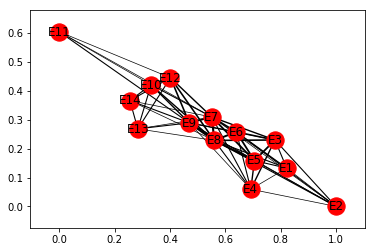

In [21]:
weights=[math.log(edata['weight']) for f,t,edata in Events.edges(data=True)]
nx.draw_networkx(Events,width=weights)
plt.show()

Judging from these two lists and the graph, my guess is that the most popular event/club is E8 and the last popular event/club is E11. Let's see who attended each of these two events/clubs.

In [54]:
E8 = nx.all_neighbors(G, 'E8')
print(list(E8))

['Theresa Anderson', 'Pearl Oglethorpe', 'Katherina Rogers', 'Sylvia Avondale', 'Verne Sanderson', 'Brenda Rogers', 'Eleanor Nye', 'Frances Anderson', 'Dorothy Murchison', 'Ruth DeSand', 'Laura Mandeville', 'Evelyn Jefferson', 'Myra Liddel', 'Helen Lloyd']


In [55]:
E11 = nx.all_neighbors(G, 'E11')
print(list(E11))

['Nora Fayette', 'Olivia Carleton', 'Helen Lloyd', 'Flora Price']


If we refer back to the list of women above, 'Nora Fayette', 'Olivia Carleton', 'Helen Lloyd', and 'Flora Price' were all women at the bottom half of the list. Again, this suggests that event/club E11 was probably not frequented or visited by the women in the top half of the list. Whereas, in E8, this event/club was likely a hotspot for these higher profile women to go to. 

As we have demonstrated, it appears that women of different classes likely interacted with each other. We suggest that the women in E11 were on a different social scale than the women in E8. If we repeat this multiple events/clubs, we likely find similar patterns of this nature.

# Another Perspective

We have decided to take another perspective and see if we could develop more (or perhaps) different insight into this group of 18 women. By utilizing different visualizations and metrics, we hope to gain more information regarding these group of women.

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To have two pandas data tables next to each other - https://stackoverflow.com/a/38801975
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [12]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 5)

Populating the interactive namespace from numpy and matplotlib


Graphical visualization of a two-way node and how the two nodes interact with each other.

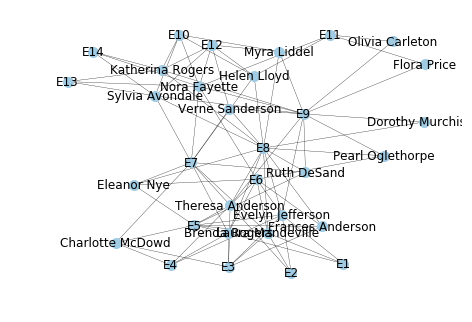

In [5]:
# Draw the bipartite graph of women and clubs
import matplotlib.pyplot as plt
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), node_color='#A0CBE2', width=.3, with_labels=True, node_size = 100)
plt.show()

'Clustering Coefficient': a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterised by a relatively high density of ties; this likelihood tends to be greater than the average probability of a tie randomly established between two nodes (Wikipedia).

This youtube video does a great job help explaining how this number is calculating (https://www.youtube.com/watch?v=K2WF4pT5pFY). The local clustering coefficient of a vertex (node) in a graph quantifies how close its neighbors are to being a complete graph (https://www.e-education.psu.edu/geog597i_02/node/832). So the higher the number of the clustering coefficient, the more tightly knitted that this specific node (woman) is in the clique.

Let's take a look and calculate the clustering coefficient for each woman.

In [7]:
import pandas as pd

Events = bipartite.weighted_projected_graph(G, clubs)
Women  = bipartite.weighted_projected_graph(G, women)

Women_cluster  = pd.DataFrame(zip(nx.clustering(Women).keys(), nx.clustering(Women).values())).sort_values(by = [1], axis=0, ascending=True)
Women_cluster

,0,1
0,Theresa Anderson,0.897059
14,Ruth DeSand,0.897059
12,Evelyn Jefferson,0.897059
6,Verne Sanderson,0.897059
5,Sylvia Avondale,0.897059
17,Helen Lloyd,0.897059
4,Nora Fayette,0.897059
3,Katherina Rogers,0.933333
16,Myra Liddel,0.933333
11,Dorothy Murchison,0.933333


As you can see, all of these numbers are quite fairly high, ranging from 0.897 to 1.000. Again, from the conclusions that we had made above, it appears that these women overall appear closely knit with each other. However, as we had seen above, not everyone is as tight with each other. We can perform the same function on events (though the significance of it is somewhat unclear). In this scenario, we could potentially interpret this as how well connected each event is with each other.

In [8]:
Events_cluster = pd.DataFrame(zip(nx.clustering(Events).keys(), nx.clustering(Events).values())).sort_values(by = [1], axis=0, ascending=True)
Events_cluster

,0,1
5,E9,0.679487
6,E8,0.679487
9,E7,0.679487
10,E6,0.679487
0,E11,1.000000
1,E10,1.000000
2,E13,1.000000
3,E12,1.000000
4,E14,1.000000
7,E5,1.000000


By using the nx.make_clique_bipartite() function, we can see if networkx can allocate these women into different cliques. And we can attempt to perform something similar with the events.

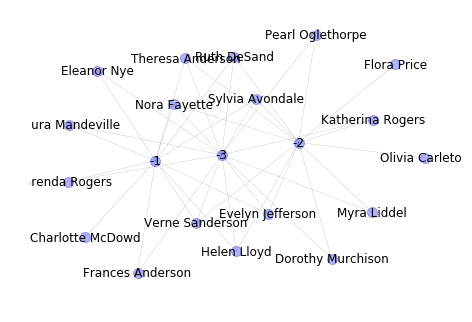

In [9]:
Women = bipartite.weighted_projected_graph(G, women)
W_cliques = nx.make_clique_bipartite(Women, G)
nx.draw(W_cliques, pos=nx.fruchterman_reingold_layout(W_cliques), node_color='b', alpha = .3, edge_color='none', width=.3, with_labels=True, node_size = 100)
plt.show()

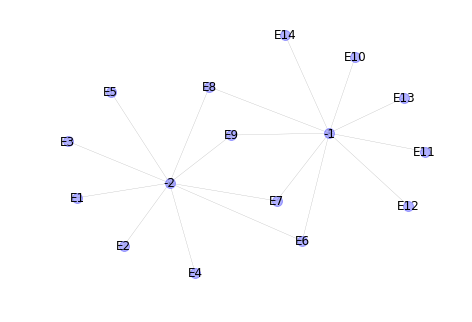

In [10]:
Events = bipartite.weighted_projected_graph(G, clubs)
E_cliques = nx.make_clique_bipartite(Events, G)
nx.draw(E_cliques, pos=nx.fruchterman_reingold_layout(E_cliques), node_color='b', alpha = .3, edge_color='none', width=.3, with_labels=True, node_size = 100)
plt.show()

This function suggests that there are 3 cliques of women in this circle of 18 women and 2 cliques of events. Within these different cliques of women, let's take a closer look at specific women and graph out their Ego Graph. 

Ego Graph: "The neighborhood graph of a given graph from a vertex v is the subgraph induced by the neighborhood of a graph from vertex v, most commonly including v itself. Such graphs are sometimes also known in more recent literature as ego graphs or ego-centered networks" (http://mathworld.wolfram.com/NeighborhoodGraph.html). 

In [17]:
x = nx.ego_graph(G, 'Flora Price', center = True, undirected = True)
print(nx.info(x))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


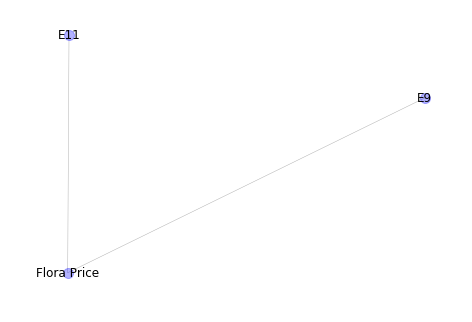

In [18]:
nx.draw(x,  node_color='b', alpha = .3, edge_color='none', width=.5, with_labels=True, node_size = 100)
plt.show()

In [19]:
x = nx.ego_graph(G, 'Brenda Rogers', center = True, undirected = True)
print(nx.info(x))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 7
Average degree:   1.7500


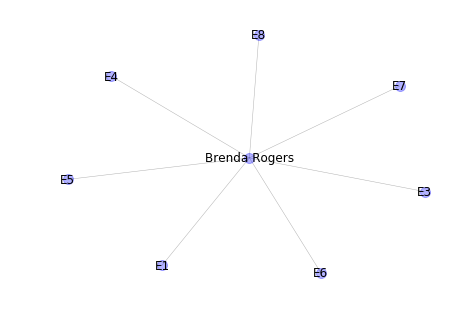

In [20]:
nx.draw(x,  node_color='b', alpha = .3, edge_color='none', width=.5, with_labels=True, node_size = 100)
plt.show()

As we can see Flora Price had attended few events, and Brenda Rogers went to many social events.

For an overall visualization of how all of the women and events/clubs are connected:

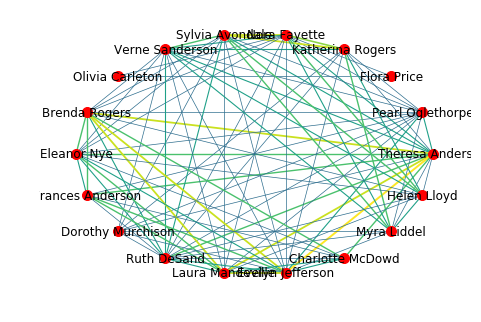

In [21]:
import math
W = bipartite.weighted_projected_graph(G, women)
weights = [math.log(edata['weight']) for f,t,edata in W.edges(data=True)]
nx.draw(W, pos=nx.shell_layout(W), width=weights, edge_color=weights, with_labels=True, node_size = 100)
plt.show()

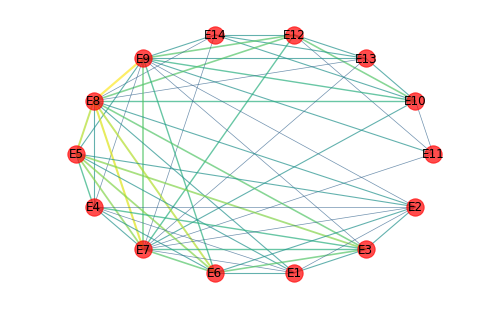

In [22]:
weights=[math.log(edata['weight']) for f,t,edata in Events.edges(data=True)]
nx.draw(Events, pos=nx.shell_layout(Events), width=weights, edge_color=weights, with_labels=True, alpha = .7)
plt.show()

# Conclusion

Networkx provides a great opportunity for us to peer into this particular social group and make some inferences in terms of what cliques have formed within them, simply by the events they had attended. These techniques and formulas simply demonstrate the power of network analysis.